In [26]:
import pandas as pd   
import funcs
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.probability import FreqDist

In [9]:
#function for initial removing links or other things which has similar construction
def prepare(stringy):
    return re.sub(r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', ' ', stringy.lower())

#read_path = 'data/arr_train.csv'
read_path = 'data/arr_test.csv'
lod_path = 'data/ranking_train.jsonl'
#lod_path = 'data/ranking_test.jsonl'

In [10]:
# pd.set_option('display.max_columns', None)  # or 1000
# pd.set_option('display.max_rows', None)  # or 1000
#pd.set_option('display.max_colwidth', 170)  # or 199
# pd.reset_option('display.max_columns')
# pd.reset_option('display.max_rows')
#pd.reset_option('display.max_colwidth')
pd.options.display.expand_frame_repr = False

In [11]:
#Load data from jsonl
jsonObj = pd.read_json(path_or_buf=lod_path, lines=True)
#initialization
zero_score = []
df = {"text":[], "comments":[], "lem_comments":[], "score":[]}
text_ar = []
comment_ar = []
score_ar = []
lem_text_ar = []
lem_com_ar = []

In [12]:
#Writing text, comments, scores into arrays and making them in lowercase, lemmatization
#len(jsonObj)
for i in tqdm(range(0,len(jsonObj))):
    for j in range(0, 5):
        text_ar.append(jsonObj['text'][i].lower())
        raw_text = prepare(jsonObj['text'][i])
        lem_text_ar.append(funcs.lemmatizer_func(raw_text)) 
        comment_ar.append(jsonObj["comments"][i][j]['text'].lower())
        raw_com = prepare(jsonObj["comments"][i][j]['text'])
        lem_com_ar.append(funcs.lemmatizer_func(raw_com))
        #lem_com_ar.append(funcs.text_preprocessing(raw_com))
        score_ar.append(jsonObj['comments'][i][j]['score'])

100%|██████████| 88107/88107 [25:58<00:00, 56.55it/s]


In [17]:
#Creating dictionary of values for pandas df
data_dict = {"text":text_ar, "lem_text":lem_text_ar, "comment":comment_ar,
    "lem_comments":lem_com_ar, "score":score_ar}

#Creating pandas df
df = pd.DataFrame(data_dict)
df.fillna('')

print(df[['text', "lem_comments"]])

                                                     text                                       lem_comments
0       how many summer y combinator fundees decided n...  go back school identical give up founder go ba...
1       how many summer y combinator fundees decided n...  invariably see success set for fall back origi...
2       how many summer y combinator fundees decided n...  school way connect go real world enter school ...
3       how many summer y combinator fundees decided n...  guess really depend hungry much believe produc...
4       how many summer y combinator fundees decided n...  know pollground decide go back school get comb...
...                                                   ...                                                ...
440530  pay your rent with a credit or debit card. no ...  major bank offer service call bill pay free di...
440531  pay your rent with a credit or debit card. no ...  cost example you look rack quot reward point q...
440532  pay your re

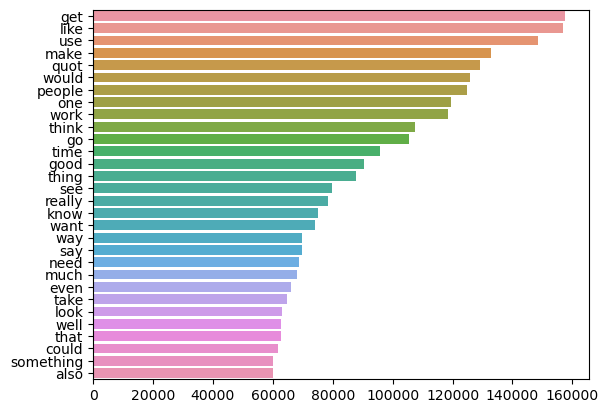

In [31]:
# сheck for most encounter words.
corpus = [word for i in df["lem_comments"].str.split().values.tolist() for word in i]
most_common = FreqDist(corpus).most_common(30)
words, frequency = [], []

for word, count in most_common:
    words.append(word)
    frequency.append(count)
    
sns.barplot(x = frequency, y = words)
plt.savefig('dict_check.svg')

In [47]:
corpus = [word for i in df["lem_comments"].fillna('').str.split().values.tolist() for word in i]
a = FreqDist(corpus).most_common()
len(a)

188993

In [12]:
df.to_csv(sav_path)

In [106]:
df = pd.read_csv(read_path)

In [107]:
df.head()

Unnamed: 0                                               text                                           lem_text                                            comment                                       lem_comments  score
0           0  how many summer y combinator fundees decided n...  many summer combinator fundees decide continue...  going back to school is not identical with giv...  go back school identical give up founder go ba...      0
1           1  how many summer y combinator fundees decided n...  many summer combinator fundees decide continue...  there will invariably be those who don't see t...  invariably see success set for fall back origi...      1
2           2  how many summer y combinator fundees decided n...  many summer combinator fundees decide continue...  for me school is a way to be connected to what...  school way connect go real world enter school ...      2
3           3  how many summer y combinator fundees decided n...  many summer combinator fundees decide continue...  i guess it really depends on how hungry you ar...  guess really depend hungry much believe produc...      3
4           4  how many summer y combinator fundees decided n...  many summer combinator fundees decide continue...  i know pollground decided to go back to school...  know pollground decide go back school get comb...      4

Создание словаря. Для дальнейшего его исопльзования в создании входного вектора признаков. Необходимо думать над его уменьшением так как для квадратной матрицы весов (простейший случай) число элементов завивист от квадрата длины этого вектора

In [132]:
corpus = [word for i in df["lem_comments"].fillna('').str.split().values.tolist() for word in i]
a = FreqDist(corpus).most_common(20000)
da = pd.DataFrame(a, columns =['word', 'freq'])

In [131]:
da.to_csv('Models/simple_vocab.csv')

('tripe', 45)